In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.helpers import pyhalo

In [2]:
color_dir = config.machine.dir_05
pickle_dir = config.machine.dir_03

lens_dict, rgb_image, rgb_model = test.get_sample(pickle_dir, color_dir, 6)

lens = lens_dict['lens']

In [3]:
model = lens.get_array(num_pix=90, side=10.)

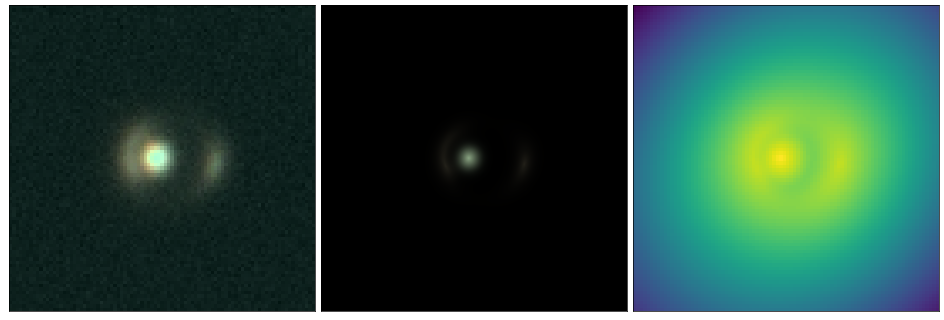

In [4]:
plot.plot_list([rgb_image, rgb_model, np.log10(model)])

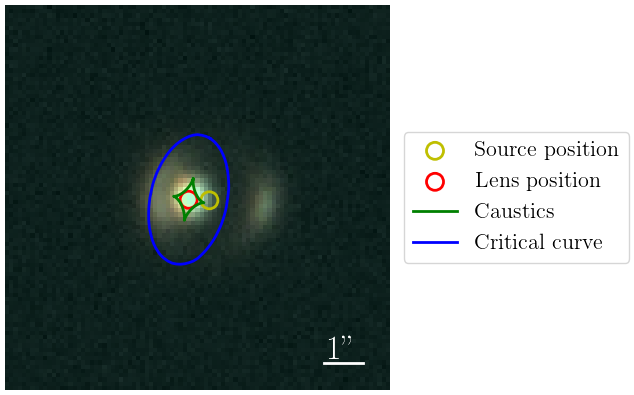

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(rgb_image, cmap='binary')

overplot.source_position(ax, lens, linewidth=2)
overplot.lens_position(ax, lens, linewidth=2)
overplot.caustics(ax, lens, linewidth=2)
overplot.critical_curves(ax, lens, linewidth=2)

plot_util.scale_bar(ax, d=lens.num_pix, dist=1 / lens.delta_pix, text='1"', color='w', font_size=24, flipped=True)
# plot_util.coordinate_arrows(ax, d=lens.num_pix * .95, coords=lens.coords, color='w', font_size=15, arrow_size=0.02)

plt.axis(False)
plt.legend(fontsize=16, bbox_to_anchor = (1.65, 0.5), loc='center right')

plt.savefig(os.path.join(figure_dir, 'roman_image.png'))
plt.show()

[critical lines are confusing, but this looks right](https://www.researchgate.net/figure/Three-basic-configurations-of-quad-lenses-cusp-top-fold-middle-and-cross-bottom_fig2_301817913)